In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import typing
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import sklearn.neighbors
import sklearn.tree
import sklearn
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
lowess = sm.nonparametric.lowess

In [126]:
# load data https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?select=1429_1.csv
csv_path = "data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
df = pd.read_csv(csv_path)

In [127]:
#looking at different attributes
print('brand')
print(df['brand'].value_counts())
print()
print('reviews.didPurchase')
print(df['reviews.didPurchase'].value_counts())
print()
print('reviews.doRecommend')
print(df['reviews.doRecommend'].value_counts())
print()
print('reviews.id')
print(df['reviews.id'].unique().size)

brand
Amazon          16153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

reviews.didPurchase
True     8
False    1
Name: reviews.didPurchase, dtype: int64

reviews.doRecommend
True     15353
False      733
Name: reviews.doRecommend, dtype: int64

reviews.id
42


In [128]:
# Attribute Removal
# dropping unuseful cols, because they mainly contain null values
# dateSeen only specifies the date when the review was scraped
unuseful_cols = ['reviews.didPurchase', 'reviews.id', 'keys', 'reviews.dateSeen', 'imageURLs', 'sourceURLs', 'reviews.sourceURLs', 'dateUpdated']
df = df.drop(unuseful_cols, axis=1)
# rename columns to make them uniform and more self-explanatory (see DataFinity for documentation)
df = df.rename(columns={
    'dateAdded': 'productDateAdded',
    'name': 'productName',
    'reviews.date': 'reviewDate',
    'reviews.doRecommend': 'reviewDoRecommend',
    'reviews.numHelpful': 'reviewNumHelpful',
    'reviews.rating': 'reviewRating',
    'reviews.text': 'reviewText',
    'reviews.title': 'reviewTitle',
    'reviews.username': 'reviewUsername'
})
df

,id,productDateAdded,productName,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,NaN,NaN,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,NaN,NaN,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,NaN,NaN,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,NaN,NaN,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,NaN,NaN,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2016-12-07T00:00:00.000Z,True,0.0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-20T00:00:00.000Z,True,0.0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-30T00:00:00.000Z,True,0.0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-02-17T00:00:00.000Z,True,0.0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ


In [129]:
# Data Cleansing
# set NaN values to 0
df['reviewNumHelpful'] = df['reviewNumHelpful'].fillna(0).astype('int16')
df['reviewDoRecommend'] = df['reviewDoRecommend'].fillna(0).astype('int16')
# set data types
df['reviewRating'] = df['reviewRating'].astype('int8')
df['reviewDate'] = pd.to_datetime(df['reviewDate']).dt.date
df['productDateAdded'] = pd.to_datetime(df['productDateAdded']).dt.date
df

,id,productDateAdded,productName,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername
0,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-03-02,0,0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-08-31,0,0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-12-06,0,0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-03-28,0,0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-04-22,0,0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2016-12-07,1,0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-20,1,0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-30,1,0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-02-17,1,0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ


In [130]:
# check for duplicates
df.duplicated().sum()

0

In [131]:
df['reviewRating'].describe()

count    28332.000000
mean         4.514048
std          0.934957
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviewRating, dtype: float64

In [132]:
df['reviewDoRecommend'].describe()

count    28332.000000
mean         0.541896
std          0.498250
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: reviewDoRecommend, dtype: float64

In [133]:
df['reviewDate'].describe()

count          28332
unique          1275
top       2017-01-23
freq             532
Name: reviewDate, dtype: object

In [134]:
# Text Pre_processing / Additional Attributes
df['reviewTextLength'] = df['reviewText'].str.len()
df['reviewTitleLength'] = df['reviewTitle'].str.len()
df

,id,productDateAdded,productName,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername,reviewTextLength,reviewTitleLength
0,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-03-02,0,0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,139,88
1,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-08-31,0,0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,67,57
2,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-12-06,0,0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,56,50
3,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-03-28,0,0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,67,52
4,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-04-22,0,0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,57,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2016-12-07,1,0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,116,9
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-20,1,0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,83,25
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-30,1,0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,317,28
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-02-17,1,0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,241,44


In [135]:
# Data Scaling
review_text_length = df['reviewTextLength']
review_title_length = df['reviewTitleLength']
review_num_helpful = df['reviewNumHelpful']
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
# transform the column with log, to mend outliers with very long review texts
review_text_length = np.log(review_text_length + 1)
review_num_helpful = np.log(review_num_helpful + 1)
review_text_length_scaled = min_max_scaler.fit_transform(review_text_length.values.reshape(-1, 1))
review_title_length_scaled = min_max_scaler.fit_transform(review_title_length.values.reshape(-1, 1))
review_num_helpful = min_max_scaler.fit_transform(review_num_helpful.values.reshape(-1, 1))
df['reviewTextLength'] = review_text_length_scaled
df['reviewTitleLength'] = review_title_length_scaled
df['reviewNumHelpful'] = review_num_helpful
df

,id,productDateAdded,productName,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername,reviewTextLength,reviewTitleLength
0,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-03-02,0,0.0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,0.509589,0.621429
1,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-08-31,0,0.0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,0.422972,0.400000
2,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-12-06,0,0.0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,0.401806,0.350000
3,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-03-28,0,0.0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,0.422972,0.364286
4,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-04-22,0,0.0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,0.403892,0.385714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2016-12-07,1,0.0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,0.488062,0.057143
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-20,1,0.0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,0.448317,0.171429
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-30,1,0.0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,0.607993,0.192857
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-02-17,1,0.0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,0.575234,0.307143


In [136]:
# Data Transformation

# incorrect dateAdded
df.loc[:, 'productName_stemmed'] = df['productName'].str.split(',').str[0].str.split(' - ').str[0]

# add review count to each author and scale it
review_counts = df['reviewUsername'].value_counts()
df['reviewUsernameReviewCount'] = df['reviewUsername'].map(review_counts)
review_counts = df['reviewUsernameReviewCount']
review_counts = np.log(review_counts + 1)
review_counts_scaled = min_max_scaler.fit_transform(review_counts.values.reshape(-1, 1))
df['reviewUsernameReviewCount'] = review_counts_scaled
# calculate days between productAdded and reviewDate
df['reviewDaysFromLaunch'] = (df['reviewDate'] - df['productDateAdded']).dt.days

# encode category columns to binary columns
#encoded_cols = df['primaryCategories'].str.get_dummies(sep=',')
#df = pd.concat([df, encoded_cols], axis=1)
#encoded_cols = df['categories'].str.get_dummies(sep=',')
#df = pd.concat([df, encoded_cols], axis=1)
df.columns = df.columns.str.replace(' ', '_')
df.drop(["id", "asins", "brand", "categories", "primaryCategories", "manufacturer", "manufacturerNumber"], axis="columns", inplace=True)
df = df.loc[df["reviewDaysFromLaunch"]>0]
df

,productDateAdded,productName,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername,reviewTextLength,reviewTitleLength,productName_stemmed,reviewUsernameReviewCount,reviewDaysFromLaunch
0,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-03-02,0,0.0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,0.509589,0.621429,AmazonBasics AAA Performance Alkaline Batterie...,0.000000,489
1,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-08-31,0,0.0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,0.422972,0.400000,AmazonBasics AAA Performance Alkaline Batterie...,0.227333,306
2,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-12-06,0,0.0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,0.401806,0.350000,AmazonBasics AAA Performance Alkaline Batterie...,0.000000,403
3,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-03-28,0,0.0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,0.422972,0.364286,AmazonBasics AAA Performance Alkaline Batterie...,0.000000,150
4,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-04-22,0,0.0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,0.403892,0.385714,AmazonBasics AAA Performance Alkaline Batterie...,0.113667,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28299,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-03-31,1,0.0,4,I liked the screen size and easy to read books...,Works good. Easy setup.,Zoey,0.522568,0.157143,Fire HD 8 Tablet with Alexa,0.066491,25
28306,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-03-10,1,0.0,5,Nicer than my old fire. Better screen area to ...,Works great,Woodzy,0.388465,0.071429,Fire HD 8 Tablet with Alexa,0.066491,4
28311,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-04-28,1,0.0,5,I wanted a tablet that was easy to use that I ...,Works great for what I need.,Meli,0.488062,0.192857,Fire HD 8 Tablet with Alexa,0.000000,53
28324,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-05-05,1,0.0,4,"Got this for my mom, so she could check facebo...",Would buy again,newsguy,0.504335,0.100000,Fire HD 8 Tablet with Alexa,0.066491,60


In [137]:

df['productName'].value_counts()
df['productName_stemmed'].value_counts()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)                                             7450
AmazonBasics AA Performance Alkaline Batteries (48 Count)                                              3146
Fire Kids Edition Tablet                                                                               2053
All-New Fire HD 8 Tablet with Alexa                                                                    1030
Fire Tablet                                                                                            1024
Fire Tablet with Alexa                                                                                 1017
All-New Fire HD 8 Tablet                                                                                752
Fire HD 8 Tablet with Alexa                                                                             551
All-New Fire HD 8 Kids Edition Tablet                                                                   526
Amazon Tap Smart Assistant A

# Data Exploration Moritz

In [138]:
df["productName_stemmed"].value_counts()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)                                             7450
AmazonBasics AA Performance Alkaline Batteries (48 Count)                                              3146
Fire Kids Edition Tablet                                                                               2053
All-New Fire HD 8 Tablet with Alexa                                                                    1030
Fire Tablet                                                                                            1024
Fire Tablet with Alexa                                                                                 1017
All-New Fire HD 8 Tablet                                                                                752
Fire HD 8 Tablet with Alexa                                                                             551
All-New Fire HD 8 Kids Edition Tablet                                                                   526
Amazon Tap Smart Assistant A

<AxesSubplot: >

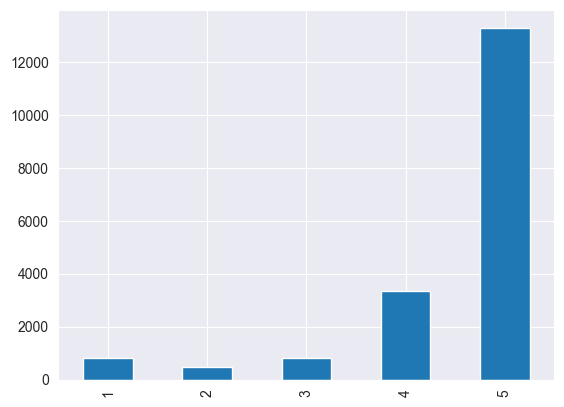

In [139]:
df['reviewRating'].value_counts().sort_index().plot.bar()

In [140]:
review_counts_per_user = df.groupby(["reviewUsername"]).size().sort_values(ascending=False).rename("ReviewCount").to_frame()
review_counts_per_user

,ReviewCount
reviewUsername,
ByAmazon Customer,839
ByKindle Customer,42
Mike,34
ByMike,21
Dave,18
...,...
ByMike D,1
ByMike Francis,1
ByMike Graham,1


In [141]:
df["reviewUsername"].nunique()

12191

In [142]:
review_counts_per_user.groupby(by="ReviewCount").size()

ReviewCount
1      8226
2      3188
3       438
4       147
5        70
6        43
7        22
8        10
9        11
10        5
11        7
12        3
13        5
14        3
15        4
16        3
17        1
18        1
21        1
34        1
42        1
839       1
dtype: int64

In [143]:
len(df["productName"].unique())

53

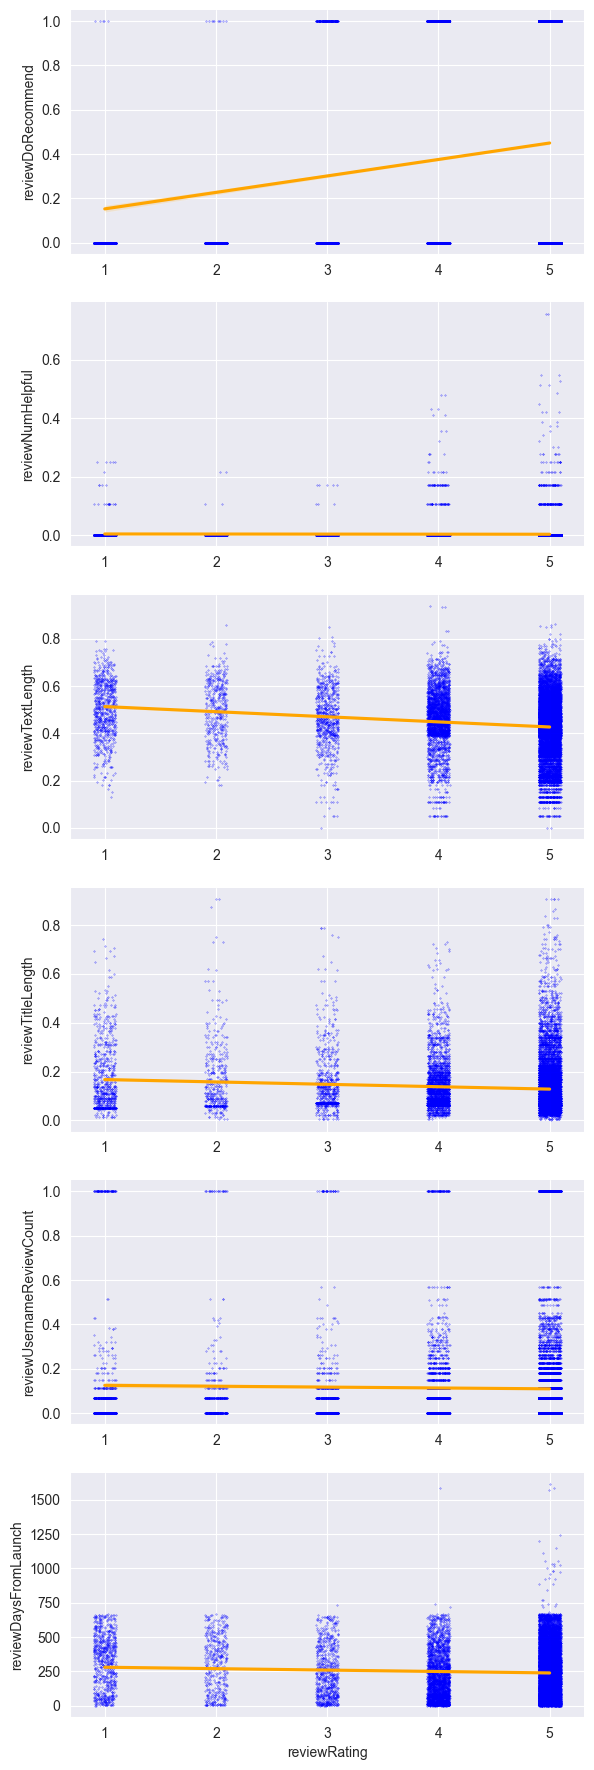

['reviewDoRecommend', 'reviewNumHelpful', 'reviewTextLength', 'reviewTitleLength', 'reviewUsernameReviewCount', 'reviewDaysFromLaunch']


In [144]:
regression_columns = ['reviewDoRecommend', 'reviewNumHelpful', 'reviewTextLength', 'reviewTitleLength', 'reviewUsernameReviewCount', 'reviewDaysFromLaunch']
pairplot = sns.pairplot(df, x_vars=['reviewRating'], y_vars=regression_columns, kind='reg', aspect=2, height=3, markers=".", plot_kws={"x_jitter":.1, "color":"orange", "lowess": False,"scatter_kws": {"color": "blue", "s":.3}})
for axis in pairplot.axes.flat:
    axis.tick_params(axis='both', labelleft=True, labelbottom=True)
plt.subplots_adjust(hspace=.2, wspace=.2)
plt.show()
print(regression_columns)

In [145]:
correlation_columns = regression_columns + ["reviewRating"]
correlation_columns.remove("reviewDoRecommend")
corr = df[correlation_columns].corr(method='pearson')
#corr = corr.where(np.triu(np.ones(corr.shape)).astype("bool"))
#np.fill_diagonal(corr.values, np.nan)
#corr = corr.stack().reset_index()
#corr = corr.iloc[:, 2]
corr

,reviewNumHelpful,reviewTextLength,reviewTitleLength,reviewUsernameReviewCount,reviewDaysFromLaunch,reviewRating
reviewNumHelpful,1.000000,0.130101,0.023983,-0.010344,-0.102966,-0.008760
reviewTextLength,0.130101,1.000000,0.399893,-0.066488,-0.228631,-0.173435
reviewTitleLength,0.023983,0.399893,1.000000,-0.020135,0.001415,-0.093412
reviewUsernameReviewCount,-0.010344,-0.066488,-0.020135,1.000000,0.032590,-0.018639
reviewDaysFromLaunch,-0.102966,-0.228631,0.001415,0.032590,1.000000,-0.056590
reviewRating,-0.008760,-0.173435,-0.093412,-0.018639,-0.056590,1.000000


In [146]:
#time_sorted = df[["productName","reviewDaysFromLaunch","reviewRating"]].sort_values(by="reviewDaysFromLaunch")
df["weeksAfterLaunch"] = df.loc[:,"reviewDaysFromLaunch"].floordiv(7, axis="index")
df.drop("reviewDaysFromLaunch", axis="columns", inplace=True)
weekly_mean = df.groupby(["weeksAfterLaunch"], as_index=False)[["reviewRating"]].mean()

weekly_mean["lowess_smoothed"] =lowess(weekly_mean["reviewRating"],weekly_mean["weeksAfterLaunch"], frac=1/5)[:,1]
weekly_mean = weekly_mean[weekly_mean["weeksAfterLaunch"]<90]

C:\Users\Koffe\AppData\Local\Temp\ipykernel_2012\2925682257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weeksAfterLaunch"] = df.loc[:,"reviewDaysFromLaunch"].floordiv(7, axis="index")
C:\Users\Koffe\AppData\Local\Temp\ipykernel_2012\2925682257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("reviewDaysFromLaunch", axis="columns", inplace=True)


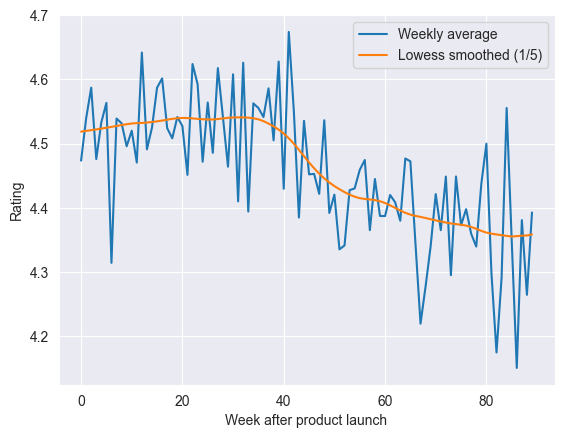

In [147]:
plt.plot(weekly_mean["weeksAfterLaunch"], weekly_mean["reviewRating"], label="Weekly average")
plt.plot(weekly_mean["weeksAfterLaunch"], weekly_mean["lowess_smoothed"], label="Lowess smoothed (1/5)")
plt.xlabel("Week after product launch")
plt.ylabel("Rating")
plt.legend()
plt.show()

# Additional transformation, aggregation

In [148]:
shift = 10
def fill_previous_target_values(df, columns: list[str]) -> pd.DataFrame:
    i = 0
    while i < shift:
        for col in columns:
            df[f'{col}_{i}'] = df[col].shift(-i)
        i += 1
    if i == shift:
        df['y'] = df['reviewRating'].shift(-i)
    df.dropna(axis=0, inplace=True)
    return df

weekly_averages = df.groupby(["weeksAfterLaunch"], as_index=True).mean(numeric_only=True)

columns = list(weekly_averages.columns)
weekly_averages = fill_previous_target_values(weekly_averages, ["reviewRating"]).loc[shift:120]
weekly_averages.drop(columns, axis="columns", inplace=True)

weekly_averages

,reviewRating_0,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5,reviewRating_6,reviewRating_7,reviewRating_8,reviewRating_9,y
weeksAfterLaunch,,,,,,,,,,,
10,4.520170,4.470588,4.641791,4.491228,4.525114,4.587156,4.601533,4.524000,4.508333,4.541463,4.527363
11,4.470588,4.641791,4.491228,4.525114,4.587156,4.601533,4.524000,4.508333,4.541463,4.527363,4.451429
12,4.641791,4.491228,4.525114,4.587156,4.601533,4.524000,4.508333,4.541463,4.527363,4.451429,4.623932
13,4.491228,4.525114,4.587156,4.601533,4.524000,4.508333,4.541463,4.527363,4.451429,4.623932,4.592593
14,4.525114,4.587156,4.601533,4.524000,4.508333,4.541463,4.527363,4.451429,4.623932,4.592593,4.471861
...,...,...,...,...,...,...,...,...,...,...,...
103,5.000000,4.000000,4.666667,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
104,4.000000,4.666667,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
105,4.666667,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Modelling (Regression)

## Train test validation split

In [149]:
train_size = .6
validation_size = .2
test_size = .2
assert train_size + validation_size + test_size == 1

In [150]:
numeric_only = weekly_averages.select_dtypes("number")

target_attribute = "y"
X = numeric_only.drop(target_attribute, axis="columns")
y = numeric_only[target_attribute]

X, __X_test, y, __y_test = train_test_split(X, y, test_size=test_size, random_state=2) # test is flagged with __* to avoid accidental usage

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=validation_size/(1-test_size), random_state=2)

In [151]:
#trying out different models
suitable_methods = [sklearn.linear_model.LinearRegression,
                    sklearn.svm.SVR,
                    sklearn.svm.LinearSVR,
                    sklearn.linear_model.Lasso,
                    sklearn.linear_model.Ridge,
                    sklearn.linear_model.RidgeCV,
                    sklearn.neighbors.KNeighborsRegressor,
                    sklearn.tree.DecisionTreeRegressor,
                    sklearn.linear_model.Lasso,
                    sklearn.linear_model.LassoCV
                    ]


trained_models = [model().fit(X_train, y_train) for model in suitable_methods]

In [152]:
model_evals = pd.DataFrame.from_dict({type(model).__name__: model.score(X_val, y_val) for model in trained_models}, orient="index").reset_index()
model_evals.sort_values(by=0, ascending=False)

,index,0
7,DecisionTreeRegressor,0.818736
8,LassoCV,0.668026
1,SVR,0.666628
4,Ridge,0.643914
5,RidgeCV,0.643914
6,KNeighborsRegressor,0.563597
2,LinearSVR,0.298490
0,LinearRegression,0.267703
3,Lasso,-0.042629


In [153]:
model = sklearn.linear_model.LassoCV()

param_grid = sklearn.model_selection.GridSearchCV(estimator=model, param_grid={
    "eps": [1e-6, 5e-6, 1e-5, 5e-4, 1e-4, 5e-5, 1e-3]
    ,"n_alphas": [25, 50, 100, 200, 400, 800, 900, 1000]
    ,"fit_intercept":[True,False]
})
param_grid.fit(X,y)
print(param_grid.best_score_)
param_grid.best_params_

0.2927965658425048


{'eps': 0.0005, 'fit_intercept': False, 'n_alphas': 25}

In [154]:
model = sklearn.linear_model.LassoCV(**param_grid.best_params_)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.6752575082132141

# Evaluation

In [155]:
print("Score on test set:")
score = model.score(__X_test, __y_test)
print(score)

print()
# X train + validation
# y train + validation
# model.fit(X, y)

print("Score on test set (retrained on train and validation data):")
print(sklearn.model_selection.cross_val_score(model, pd.concat([X,__X_test],axis="index"), pd.concat([y,__y_test], axis="index")).mean())
# (sklearn.metrics.d2_absolute_error_score, sklearn.metrics.r2_score, sklearn.metrics.d2_pinball_score)


Score on test set:
0.21297010722946252

Score on test set (retrained on train and validation data):
0.25769004526646494


In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = model.predict(__X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(__y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate the mean squared error
mse = mean_squared_error(__y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(__y_test, y_pred)
print("R^2 Score:", r2)

Mean Absolute Error: 0.09530382614615372
Mean Squared Error: 0.02607638864672268
Root Mean Squared Error: 0.16148185237580934
R^2 Score: 0.21297010722946252


In [157]:
trivial_predictions = [y_train.mean()] * len(__y_test)
trained_predictions = model.predict(__X_test)


trivial_mae = mean_absolute_error(__y_test, trivial_predictions)
print("Mean Absolute Error:", trivial_mae)
trivial_mse = mean_squared_error(__y_test, trivial_predictions)
print("Mean Squared Error:", trivial_mse)
trivial_rmse = np.sqrt(trivial_mse)
print("Root Mean Squared Error:", trivial_rmse)
trivial_r2 = r2_score(__y_test, trivial_predictions)
print("R^2 Score:", trivial_r2)


print("Mean rating:")
print(df['reviewRating'].mean())
print("Standard deviation:")
print(y_train.std())
print(y_train.mean())

Mean Absolute Error: 0.12409601386648905
Mean Squared Error: 0.03358300278024783
Root Mean Squared Error: 0.18325665821532333
R^2 Score: -0.013592312767319426
Mean rating:
4.483505374055549
Standard deviation:
0.2659883299687079
4.519766444730559


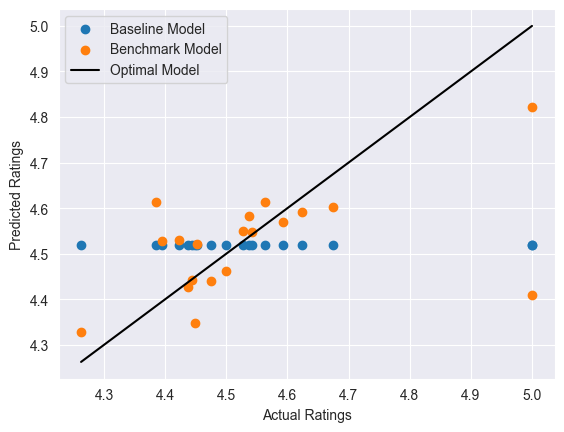

In [158]:
# Create scatter plot
plt.scatter(__y_test, trivial_predictions, label='Baseline Model')
plt.scatter(__y_test, trained_predictions, label='Benchmark Model')
# Create line for optimal predictions
x_line = [min(__y_test), max(__y_test)]
y_line = [min(__y_test), max(__y_test)]
plt.plot(x_line, y_line, 'k-', label='Optimal Model')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()